In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
import tensorflow as tf


In [11]:
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 251ms/step - accuracy: 0.8345 - loss: 0.3750 - val_accuracy: 0.9082 - val_loss: 0.2132
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 259ms/step - accuracy: 0.8963 - loss: 0.2429 - val_accuracy: 0.9028 - val_loss: 0.2219
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 240ms/step - accuracy: 0.9054 - loss: 0.2169 - val_accuracy: 0.9154 - val_loss: 0.1989
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 239ms/step - accuracy: 0.9155 - loss: 0.2060 - val_accuracy: 0.9074 - val_loss: 0.2167
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 243ms/step - accuracy: 0.9193 - loss: 0.1960 - val_accuracy: 0.9168 - val_loss: 0.1896
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 258ms/step - accuracy: 0.9194 - loss: 0.1936 - val_accuracy: 0.9230 - val_loss: 0.1897
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 242ms/step - accuracy: 0.9301 - loss: 0.1699 - val_accuracy: 0.9246 - val_loss: 0.1810
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 243ms/step - accuracy: 0.9343 - loss: 0.16

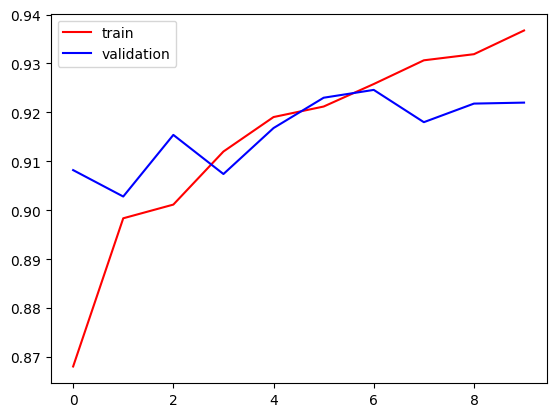

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

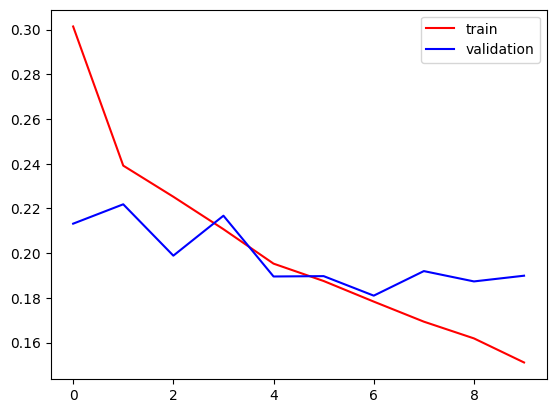

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()